In [1]:
import pandas as pd

try:
    df = pd.read_csv('Mall_Customers.csv')
    df.head()
    print(df.shape)
except FileNotFoundError:
    print("Error: 'Mall_Customers.csv' not found. Please ensure the file is in the correct location and accessible.")
    df = None # Assign None to df to indicate failure
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

(200, 5)


Descriptive Statistics:


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000



Missing Values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


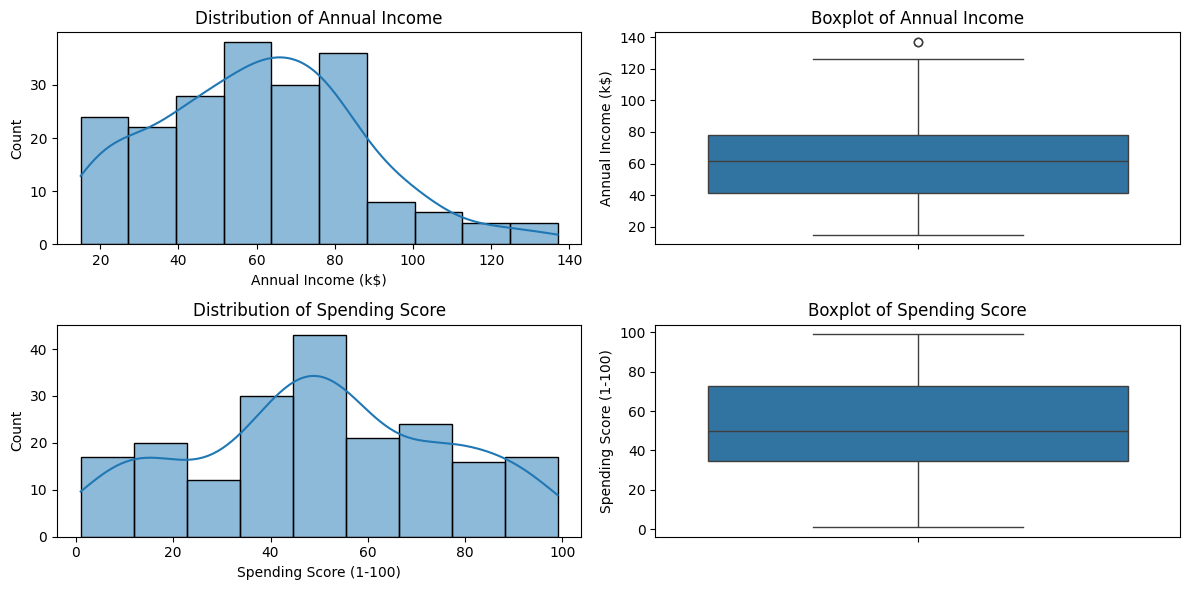

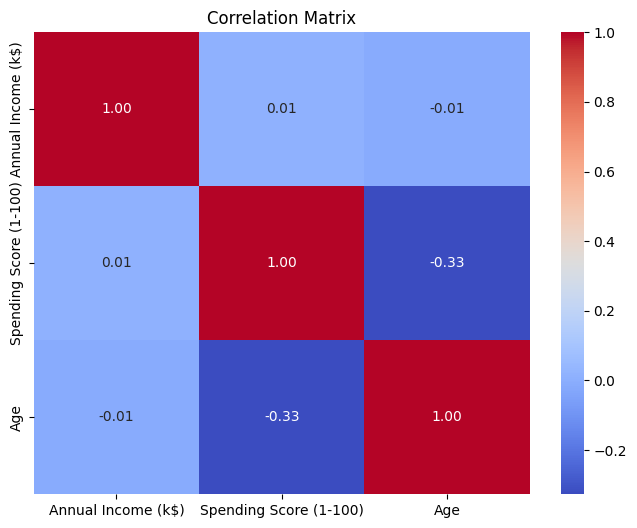


Summary of Observations:
The descriptive statistics provide an overview of the central tendency, dispersion, and range of the numerical features.  The distribution plots and box plots reveal the shape of the data and potential outliers in 'Annual Income' and 'Spending Score'.
The correlation matrix heatmap shows the relationships between these features.
Missing values check reveals any data quality issues that needs to be addressed further.


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Basic statistics
print("Descriptive Statistics:")
display(df.describe())

# 2. Missing values
print("\nMissing Values:")
print(df.isnull().sum())

# 3. Distributions of 'Annual Income' and 'Spending Score'
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(df['Annual Income (k$)'], kde=True)
plt.title('Distribution of Annual Income')

plt.subplot(2, 2, 2)
sns.boxplot(y=df['Annual Income (k$)'])
plt.title('Boxplot of Annual Income')

plt.subplot(2, 2, 3)
sns.histplot(df['Spending Score (1-100)'], kde=True)
plt.title('Distribution of Spending Score')

plt.subplot(2, 2, 4)
sns.boxplot(y=df['Spending Score (1-100)'])
plt.title('Boxplot of Spending Score')
plt.tight_layout()
plt.show()


# 4. Correlation Matrix
correlation_matrix = df[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# 5. Summary of observations (printed to console)
print("\nSummary of Observations:")
print("The descriptive statistics provide an overview of the central tendency, dispersion, and range of the numerical features.  The distribution plots and box plots reveal the shape of the data and potential outliers in 'Annual Income' and 'Spending Score'.")
print("The correlation matrix heatmap shows the relationships between these features.")
print("Missing values check reveals any data quality issues that needs to be addressed further.")


In [4]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Select features
df_selected = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Scale the features
scaler = StandardScaler()
df_scaled_array = scaler.fit_transform(df_selected)
df_scaled = pd.DataFrame(df_scaled_array, columns=df_selected.columns)

display(df_scaled.head())

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


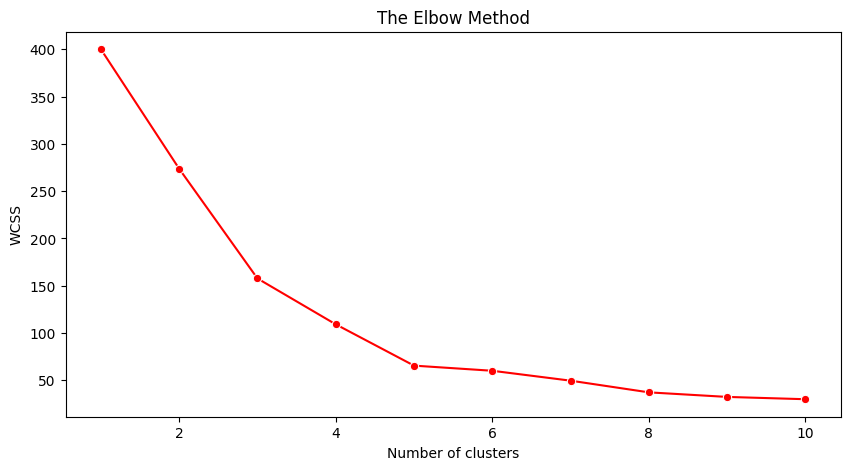

Optimal number of clusters (k): 5


In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns # Ensure seaborn is imported

wcss = []
for i in range(1, 11):
    # Explicitly set n_init to 'auto' or a specific number to avoid future warnings
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init='auto')
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
# Pass x and y data using keyword arguments
sns.lineplot(x=range(1, 11), y=wcss, marker='o', color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Determine the optimal k based on the elbow plot
# In this case, visually inspecting the plot suggests k=5
k = 5
print(f"Optimal number of clusters (k): {k}")

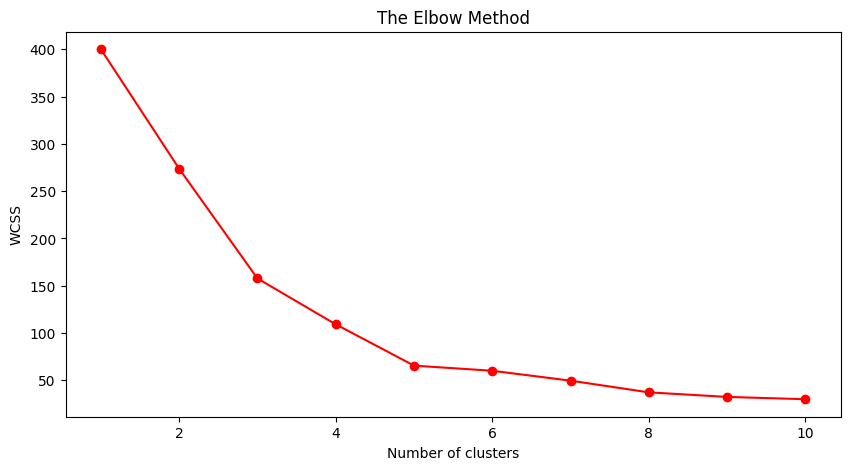

Optimal number of clusters (k): 5


In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Determine the optimal k based on the elbow plot
# In this case, visually inspecting the plot suggests k=5
k = 5
print(f"Optimal number of clusters (k): {k}")

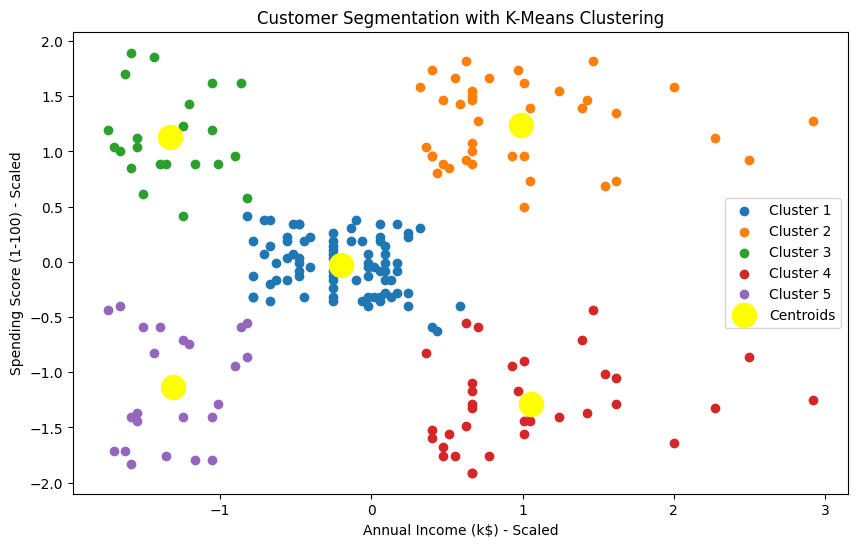

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Optimal k value from the previous step
k = 5

# Train the KMeans model
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
kmeans.fit(df_scaled)

# Get cluster labels
labels = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(10, 6))
for i in range(k):
    plt.scatter(df_scaled[labels == i]['Annual Income (k$)'], 
                df_scaled[labels == i]['Spending Score (1-100)'], 
                label=f'Cluster {i+1}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Customer Segmentation with K-Means Clustering')
plt.xlabel('Annual Income (k$) - Scaled')
plt.ylabel('Spending Score (1-100) - Scaled')
plt.legend()
plt.show()